Accuracy Score: 89.48497854077253
[[1364  128]
 [ 117  721]]


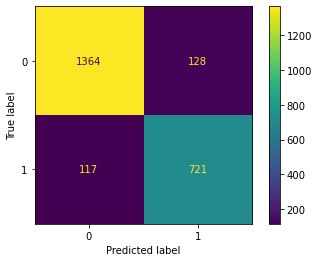

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
from random import randint as ri
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings('ignore')



data = pd.read_csv('flight3.csv')

features = data[["N_Traffic","NE_Traffic","E_Traffic","SE_Traffic","S_Traffic","SW_Traffic","W_Traffic","NW_Traffic","Clogging?"]]

d = {'Yes': 1, 'No': 0}

features = features.replace({'S_Traffic': d})
features = features.replace({'N_Traffic': d})
features = features.replace({'E_Traffic': d})
features = features.replace({'W_Traffic': d})
features = features.replace({'Clogging?': d})
features = features.replace({'NE_Traffic': d})
features = features.replace({'SE_Traffic': d})
features = features.replace({'SW_Traffic': d})
features = features.replace({'NW_Traffic': d})

X, y = features[features.columns[:-1]], features['Clogging?']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.90,random_state=ri(1, 50))

clf = RandomForestClassifier(n_estimators=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
print(cm)
x = plot_confusion_matrix(clf, X_test, y_test)
plt.savefig('Random Forest Classifier.jpg')
plt.show()


In [2]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       510
           1       1.00      0.99      0.99       267

    accuracy                           1.00       777
   macro avg       1.00      1.00      1.00       777
weighted avg       1.00      1.00      1.00       777

